In [12]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random
%matplotlib inline
import numpy as np
#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#shape of dataset
print('train_X: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))




train_X: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [36]:
def show(image, title):
    index = 1
    plt.figure(figsize=(10,5))

    for x in zip(image, title):
        image = x[0]
        title = x[1]
        plt.subplot(2, 5, index)
        plt.imshow(image, cmap=plt.cm.gray)
        plt.title(x[1], fontsize = 9)
        index += 1



In [46]:
def create_single_collage(idx_list):
    row1 = np.concatenate((train_X[idx_list[0]], train_X[idx_list[1]]), axis=1)
    row2 = np.concatenate((train_X[idx_list[2]], train_X[idx_list[3]]), axis=1)
    collaged_X = np.concatenate((row1, row2), axis=0)
    collaged_y = np.array([train_y[idx_list[0]],train_y[idx_list[1]],train_y[idx_list[2]],train_y[idx_list[3]]])
    return collaged_X, collaged_y

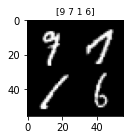

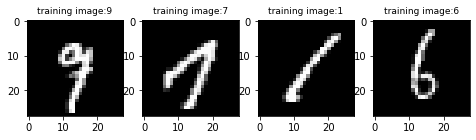

In [47]:
image = []
title = []
idx = []
for i in range(4):
    r = random.randint(1, len(train_X))
    image.append(train_X[r])
    idx.append(r)
    title.append('training image:' + str(train_y[r]))
(X,y) = create_single_collage(idx)
collaged_X = [X]
collaged_y = [y]
show(collaged_X, collaged_y)

show(image, title)

In [56]:
def generate_random_idx_list(l):
    idx_list = random.sample(range(len(train_X)), k=l)
    return np.array(idx_list)

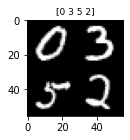

In [57]:
idx_list = generate_random_idx_list(4)
(X,y) = create_single_collage(idx_list)
collaged_X = [X]
collaged_y = [y]
show(collaged_X, collaged_y)

(6000, 56, 56) (6000, 4)


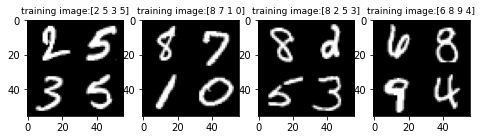

In [77]:
dataset_len =6000
collaged_X = []
collaged_y = []
for i in range(dataset_len):
    idx_list = generate_random_idx_list(4)
    (X,y) = create_single_collage(idx_list)
    collaged_X.append(X)
    collaged_y.append(y)
collaged_X = np.array(collaged_X)
collaged_y = np.array(collaged_y)
print(np.array(collaged_X).shape, np.array(collaged_y).shape)
image = []
title = []
for i in range(4):
    r = random.randint(1, len(collaged_X))
    image.append(collaged_X[r])
    title.append('training image:' + str(collaged_y[r]))

show(image, title)

In [91]:
modified_idx_list = random.sample(range(len(collaged_X)), k=len(collaged_X)//2)
label = np.ones(len(collaged_X))
label[modified_idx_list] = 0
print(np.where(label==0)[0].shape)
print(label.shape)
text = np.zeros(collaged_y.shape)
for i in range(len(collaged_X)):
    if i in modified_idx_list:
#         print(collaged_y[i])
        text[i] = (collaged_y[i]+3)%10
#         print(text[i])
    else:
        text[i] = collaged_y[i]
        
text_int = text.astype(int)
print(text_int[:10], collaged_y[:10])

for i in range(len(collaged_y)):
    if i in modified_idx_list:
        assert((not np.array_equal(collaged_y[i], text_int[i]) ) and label[i]==0)
    else:
        assert(np.array_equal(collaged_y[i], text_int[i]) and label[i]==1)
print('done')

(3000,)
(6000,)
[[8 7 7 1]
 [2 3 6 8]
 [4 0 0 5]
 [0 8 6 2]
 [0 2 5 5]
 [5 6 9 3]
 [2 6 7 6]
 [2 6 5 1]
 [5 4 5 6]
 [1 8 4 1]] [[8 7 7 1]
 [2 3 6 8]
 [1 7 7 2]
 [0 8 6 2]
 [7 9 2 2]
 [5 6 9 3]
 [2 6 7 6]
 [2 6 5 1]
 [2 1 2 3]
 [1 8 4 1]]
done


In [92]:
import pickle

In [93]:
collaged_MNIST_dataset = {'image':collaged_X, 'text':text_int, 'label':label}
pickle.dump(collaged_MNIST_dataset, open('collaged_MNIST.p','wb'))

In [96]:
dataset = pickle.load(open('collaged_MNIST.p','rb'))
for key in dataset:
    print(dataset[key][:10])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[8 7 7 1]
 [2 3 6 8]
 [4 0 0 5]
 [0 8 6 2]
 [0 2 5 5]
 [5 6 9 3]
 [2 6 7 6]
 [2 6 5 1]
 [5 4 5 6]
 [1 8 4 1]]
[1. 1. 0. 1. 0. 1. 1. 1. 0. 1.]
